In [28]:
import numpy as np

In [29]:
n_train = 10000

In [30]:
y_train = np.load("out/y_train.npy")

idx = np.random.choice(len(y_train), n_train, replace=False)
classes, counts = np.unique(y_train[idx], return_counts=True)

In [31]:
# Find threshold such that number of observed classes is small.

threshold = 50

sub_classes = classes[counts > threshold]
sub_counts = counts[counts > threshold]

print(sub_classes)
print(sub_counts)
print(len(sub_classes))

[  0   1   2   4   6   8  15  17  24  32  33  36  47  48  49  52  87  89
 113 115 116 145 146 147 148 149 151 152 153 155 172]
[3683  293  324  244   73  277  153   52  124   90  116  223  114  141
   81  144   60  125   62   63  295  226  802  552  122  196   76   95
  251   65   82]
31


In [32]:
# Subset original idx to be those from one of the classes.
sub_idx = np.isin(y_train[idx], sub_classes)

train_idx = idx[sub_idx]

print(len(train_idx))
np.save("train_idx.npy", train_idx)

9204


In [34]:
# Get validation and test indices for these classes.
np.random.seed(123)

for split in ["val", "test"]:

    y = np.load("out/y_%s.npy" % split)
    idx = np.random.choice(len(y), 5000, replace=False)
    sub_idx = np.isin(y[idx], sub_classes)
    sub_sub_idx = idx[sub_idx]
    print(len(sub_sub_idx))
    print(len(np.unique(y[sub_sub_idx])))
    np.save("%s_idx.npy" % split, sub_sub_idx)

4376
29
4629
30


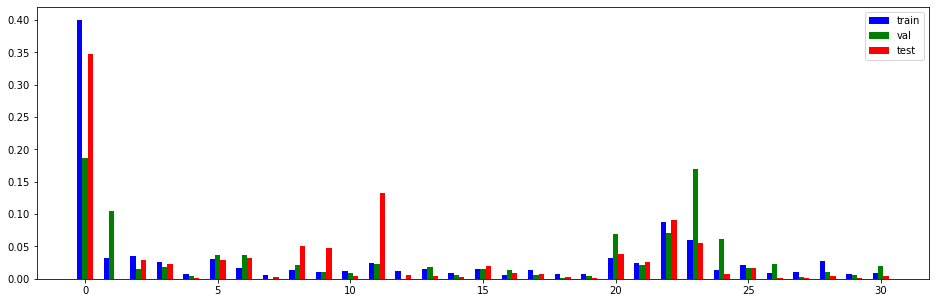

In [53]:
# Assess class distributions.
import matplotlib.pyplot as plt

def split_to_counts(split):
    idx = np.load("%s_idx.npy" % split)
    y = np.load("out/y_%s.npy" % split)
    
    classes, counts_ = np.unique(y[idx], return_counts=True)
    
    counts = np.zeros(len(sub_classes))
    
    for i, sub_class in enumerate(sub_classes):
        for j, obs_class in enumerate(classes):
            if obs_class == sub_class:
                counts[i] += counts_[j]
        
    return counts / counts.sum()
        
x = np.arange(len(sub_classes))
y1 = split_to_counts("train")
y2 = split_to_counts("val")
y3 = split_to_counts("test")

# ax = plt.subplot(111)
fig, ax = plt.subplots(figsize=(16,5))
ax.bar(x-0.2, y1, width=0.2, color='b', align='center', label="train")
ax.bar(x, y2, width=0.2, color='g', align='center', label="val")
ax.bar(x+0.2, y3, width=0.2, color='r', align='center', label="test")
plt.legend()

plt.show()